In [1]:
import numpy as np
import pandas as pd

In [2]:
dataframe = pd.read_csv('nba.csv')

In [3]:
dataframe.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      457 non-null    object 
 1   Team      457 non-null    object 
 2   Number    457 non-null    float64
 3   Position  457 non-null    object 
 4   Age       457 non-null    float64
 5   Height    457 non-null    object 
 6   Weight    457 non-null    float64
 7   College   373 non-null    object 
 8   Salary    446 non-null    float64
dtypes: float64(4), object(5)
memory usage: 32.3+ KB


In [5]:
dataframe.describe()

,Number,Age,Weight,Salary
count,457.000000,457.000000,457.000000,4.460000e+02
mean,17.678337,26.938731,221.522976,4.842684e+06
std,15.966090,4.404016,26.368343,5.229238e+06
min,0.000000,19.000000,161.000000,3.088800e+04
25%,5.000000,24.000000,200.000000,1.044792e+06
50%,13.000000,26.000000,220.000000,2.839073e+06
75%,25.000000,30.000000,240.000000,6.500000e+06
max,99.000000,40.000000,307.000000,2.500000e+07


In [6]:
dataframe.dtypes

Name         object
Team         object
Number      float64
Position     object
Age         float64
Height       object
Weight      float64
College      object
Salary      float64
dtype: object

In [7]:
dataframe.isnull().sum()

Name         1
Team         1
Number       1
Position     1
Age          1
Height       1
Weight       1
College     85
Salary      12
dtype: int64

In [8]:
dataframe.shape

(458, 9)

In [9]:
dataframe['Height'] = dataframe['Height'].str.replace('-','.')

In [10]:
dataframe.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6.2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6.6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6.5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6.5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6.10,231.0,NaN,5000000.0


In [11]:
dataframe['Height'] = dataframe['Height'].astype(float)
dataframe.dtypes

Name         object
Team         object
Number      float64
Position     object
Age         float64
Height      float64
Weight      float64
College      object
Salary      float64
dtype: object

In [12]:
dataframe["Position"].unique()

array(['PG', 'SF', 'SG', 'PF', 'C', nan], dtype=object)

In [13]:
test = pd.get_dummies(dataframe["Position"], dtype=int)
test


,C,PF,PG,SF,SG
0,0,0,1,0,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,0,0,0,1
4,0,1,0,0,0
...,...,...,...,...,...
453,0,0,1,0,0
454,0,0,1,0,0
455,1,0,0,0,0
456,1,0,0,0,0


In [14]:
dataframe = pd.concat([dataframe, test], axis=1)
dataframe.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,C,PF,PG,SF,SG
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6.2,180.0,Texas,7730337.0,0,0,1,0,0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6.6,235.0,Marquette,6796117.0,0,0,0,1,0
2,John Holland,Boston Celtics,30.0,SG,27.0,6.5,205.0,Boston University,NaN,0,0,0,0,1
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6.5,185.0,Georgia State,1148640.0,0,0,0,0,1
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6.1,231.0,NaN,5000000.0,0,1,0,0,0


In [16]:
dataframe = dataframe.drop('Position', axis=1)
dataframe

,Name,Team,Number,Age,Height,Weight,College,Salary,C,PF,PG,SF,SG
0,Avery Bradley,Boston Celtics,0.0,25.0,6.2,180.0,Texas,7730337.0,0,0,1,0,0
1,Jae Crowder,Boston Celtics,99.0,25.0,6.6,235.0,Marquette,6796117.0,0,0,0,1,0
2,John Holland,Boston Celtics,30.0,27.0,6.5,205.0,Boston University,NaN,0,0,0,0,1
3,R.J. Hunter,Boston Celtics,28.0,22.0,6.5,185.0,Georgia State,1148640.0,0,0,0,0,1
4,Jonas Jerebko,Boston Celtics,8.0,29.0,6.1,231.0,NaN,5000000.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8.0,26.0,6.3,203.0,Butler,2433333.0,0,0,1,0,0
454,Raul Neto,Utah Jazz,25.0,24.0,6.1,179.0,NaN,900000.0,0,0,1,0,0
455,Tibor Pleiss,Utah Jazz,21.0,26.0,7.3,256.0,NaN,2900000.0,1,0,0,0,0
456,Jeff Withey,Utah Jazz,24.0,26.0,7.0,231.0,Kansas,947276.0,1,0,0,0,0


In [17]:
dataframe.dtypes

Name        object
Team        object
Number     float64
Age        float64
Height     float64
Weight     float64
College     object
Salary     float64
C            int64
PF           int64
PG           int64
SF           int64
SG           int64
dtype: object

In [18]:
test = dataframe.dropna()
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 364 entries, 0 to 456
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Name     364 non-null    object 
 1   Team     364 non-null    object 
 2   Number   364 non-null    float64
 3   Age      364 non-null    float64
 4   Height   364 non-null    float64
 5   Weight   364 non-null    float64
 6   College  364 non-null    object 
 7   Salary   364 non-null    float64
 8   C        364 non-null    int64  
 9   PF       364 non-null    int64  
 10  PG       364 non-null    int64  
 11  SF       364 non-null    int64  
 12  SG       364 non-null    int64  
dtypes: float64(5), int64(5), object(3)
memory usage: 39.8+ KB


In [20]:
dataframe.isnull().sum()

Name        1
Team        1
Number      1
Age         1
Height      1
Weight      1
College    85
Salary     12
C           0
PF          0
PG          0
SF          0
SG          0
dtype: int64

In [21]:
dataframe["Salary"] = dataframe["Salary"].fillna(dataframe["Salary"].mean())
dataframe.isnull().sum()

Name        1
Team        1
Number      1
Age         1
Height      1
Weight      1
College    85
Salary      0
C           0
PF          0
PG          0
SF          0
SG          0
dtype: int64

In [23]:
dataframe["Height"] = dataframe["Height"].fillna(dataframe["Height"].median())
dataframe.isnull().sum()

Name        1
Team        1
Number      1
Age         1
Height      0
Weight      1
College    85
Salary      0
C           0
PF          0
PG          0
SF          0
SG          0
dtype: int64

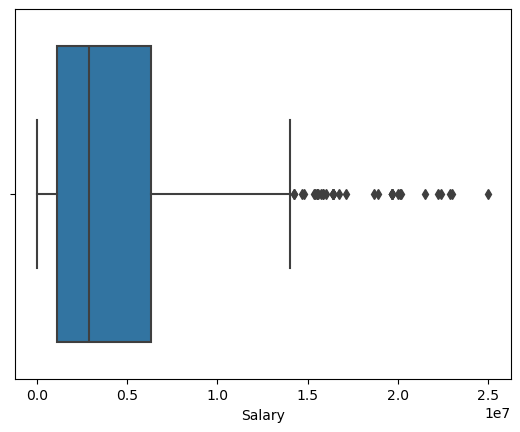

In [24]:
# outlier detection

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x = "Salary", data= dataframe)
plt.show()

In [28]:
max_threshold = dataframe["Salary"].quantile(0.95)
print(max_threshold)

16407500.0


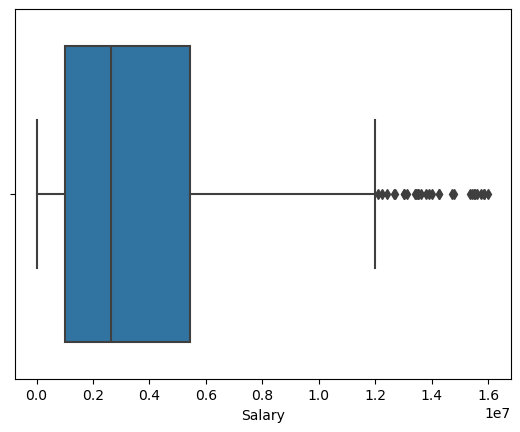

In [29]:
dataframe = dataframe[dataframe["Salary"] < max_threshold]
sns.boxplot(x = "Salary", data= dataframe)
plt.show()

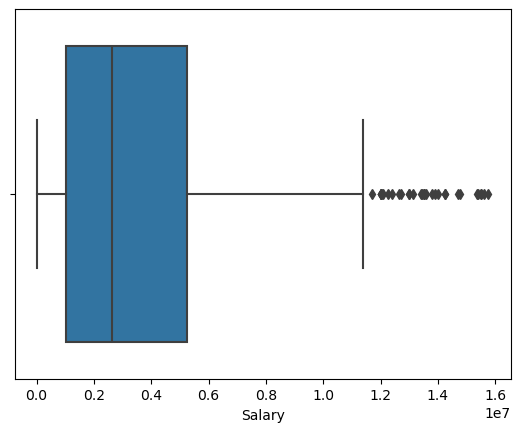

In [31]:
z = (dataframe["Salary"] - dataframe["Salary"].mean()) / dataframe["Salary"].std()
z

dataframe = dataframe[(z < 3) & (z > -3)]
sns.boxplot(x = "Salary", data= dataframe)
plt.show()


In [32]:
dataframe["scaled salary"] = (dataframe["Salary"] - dataframe["Salary"].min())/ (dataframe["Salary"].max() - dataframe["Salary"].min())
dataframe

,Name,Team,Number,Age,Height,Weight,College,Salary,C,PF,PG,SF,SG,scaled salary
0,Avery Bradley,Boston Celtics,0.0,25.0,6.2,180.0,Texas,7.730337e+06,0,0,1,0,0,0.489614
1,Jae Crowder,Boston Celtics,99.0,25.0,6.6,235.0,Marquette,6.796117e+06,0,0,0,1,0,0.430206
2,John Holland,Boston Celtics,30.0,27.0,6.5,205.0,Boston University,4.842684e+06,0,0,0,0,1,0.305986
3,R.J. Hunter,Boston Celtics,28.0,22.0,6.5,185.0,Georgia State,1.148640e+06,0,0,0,0,1,0.071079
4,Jonas Jerebko,Boston Celtics,8.0,29.0,6.1,231.0,NaN,5.000000e+06,0,1,0,0,0,0.315990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8.0,26.0,6.3,203.0,Butler,2.433333e+06,0,0,1,0,0,0.152773
454,Raul Neto,Utah Jazz,25.0,24.0,6.1,179.0,NaN,9.000000e+05,0,0,1,0,0,0.055268
455,Tibor Pleiss,Utah Jazz,21.0,26.0,7.3,256.0,NaN,2.900000e+06,1,0,0,0,0,0.182449
456,Jeff Withey,Utah Jazz,24.0,26.0,7.0,231.0,Kansas,9.472760e+05,1,0,0,0,0,0.058274


In [38]:
bins = [0, 20, 30, 40]
labels = ["<20", "20 - 30", " 30 - 40"]

dataframe['Age Group'] = pd.cut(x = dataframe['Age'], bins = bins, labels= labels)
dataframe

,Name,Team,Number,Age,Height,Weight,College,Salary,C,PF,PG,SF,SG,scaled salary,Age Group
0,Avery Bradley,Boston Celtics,0.0,25.0,6.2,180.0,Texas,7.730337e+06,0,0,1,0,0,0.489614,20 - 30
1,Jae Crowder,Boston Celtics,99.0,25.0,6.6,235.0,Marquette,6.796117e+06,0,0,0,1,0,0.430206,20 - 30
2,John Holland,Boston Celtics,30.0,27.0,6.5,205.0,Boston University,4.842684e+06,0,0,0,0,1,0.305986,20 - 30
3,R.J. Hunter,Boston Celtics,28.0,22.0,6.5,185.0,Georgia State,1.148640e+06,0,0,0,0,1,0.071079,20 - 30
4,Jonas Jerebko,Boston Celtics,8.0,29.0,6.1,231.0,NaN,5.000000e+06,0,1,0,0,0,0.315990,20 - 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8.0,26.0,6.3,203.0,Butler,2.433333e+06,0,0,1,0,0,0.152773,20 - 30
454,Raul Neto,Utah Jazz,25.0,24.0,6.1,179.0,NaN,9.000000e+05,0,0,1,0,0,0.055268,20 - 30
455,Tibor Pleiss,Utah Jazz,21.0,26.0,7.3,256.0,NaN,2.900000e+06,1,0,0,0,0,0.182449,20 - 30
456,Jeff Withey,Utah Jazz,24.0,26.0,7.0,231.0,Kansas,9.472760e+05,1,0,0,0,0,0.058274,20 - 30
